## Project team's ID is "    PTID-CDS-APR-24-1897   "

## **BATCH ID** **:** 25-DEC-CDS-BUN-021-WDM11-BAN

## **PROJECT** **:** PRCP- 1001- RiceLeaf disease detection

### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


### **Domain Expertise**
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
- The classes are:-
- **Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv.Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
- **Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds, and can cause 10-58% seedling mortality.
- **Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.
**The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import urllib

In [3]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 5
epochs = 30

In [4]:
data=data = tf.keras.utils.image_dataset_from_directory(directory="data",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 119 files belonging to 3 classes.


In [5]:
class_names = data.class_names
class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

### The 3 class are - Bacterial Leaf blight,Brown spot,Leaf smut

In [6]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset to count occurrences of each class label
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts
print(class_counts)

{0: 40, 1: 40, 2: 39}


In [7]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Image Visualisation

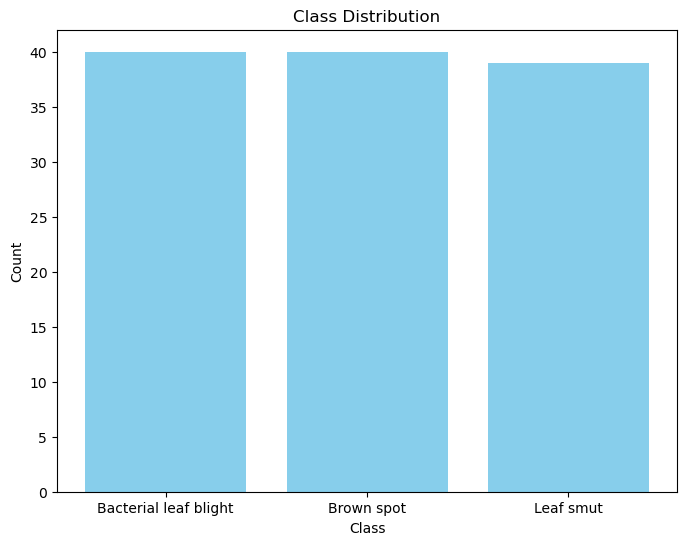

In [11]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]  # Replace with your actual counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

###### 
- From the graph we can clearly see that there are a total of 119 images.
- 40 in Bacterial Leaf Blight and Brown Spot.
- 39 images available in Leaf Smut.

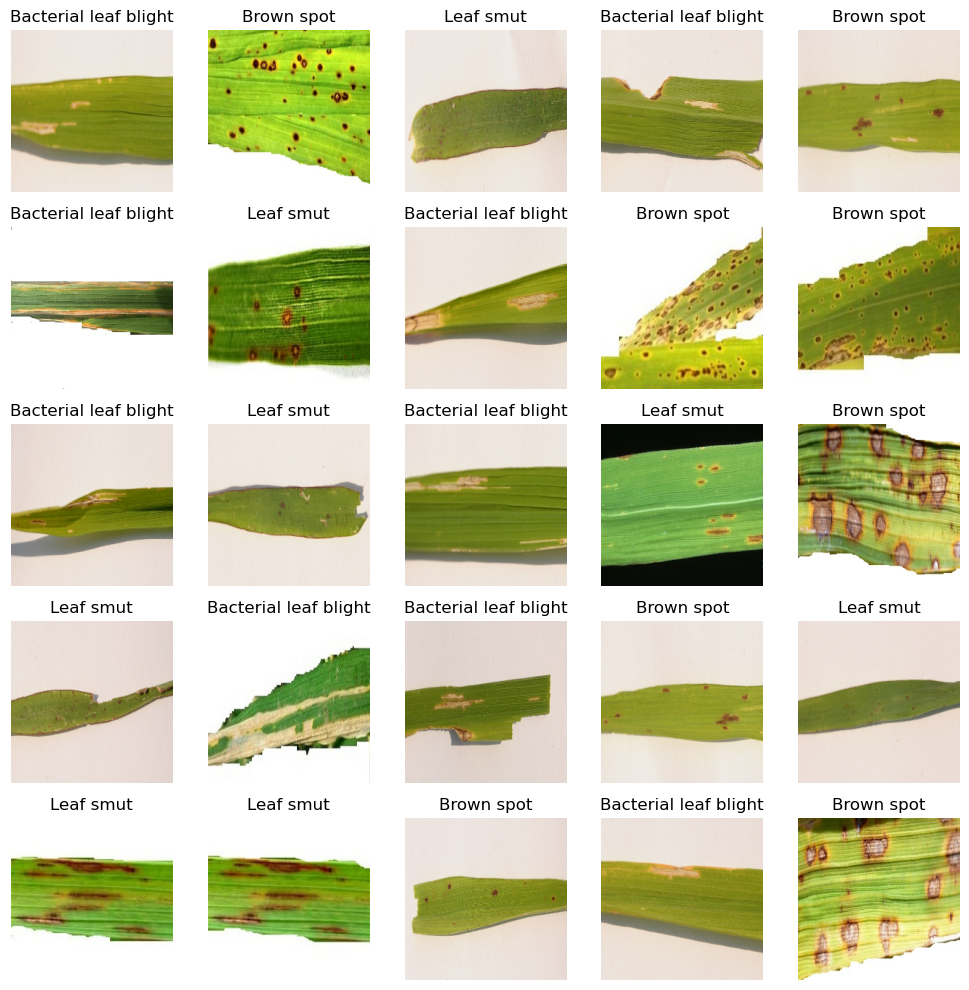

In [12]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

In [13]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [14]:
X

array([[[[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        ...,

        [[ 10.238839 ,  11.238839 ,   

In [15]:
X = X.astype('float32')/255

In [16]:
# Splitt data into train and test / validation

X_train, X_test = X[:95 ],X[95:]
y_train, y_test = y[:95] ,y[95:]

In [17]:

X_train.shape , X_test.shape

((95, 224, 224, 3), (24, 224, 224, 3))

In [18]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

In [19]:
# relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
         #It has a derivative of either 0 or 1, depending on whether its input is negative or not
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3588 - loss: 1.7494 - val_accuracy: 0.3158 - val_loss: 1.2895
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 994ms/step - accuracy: 0.3246 - loss: 1.2335 - val_accuracy: 0.2632 - val_loss: 1.0888
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 973ms/step - accuracy: 0.3875 - loss: 1.1445 - val_accuracy: 0.4211 - val_loss: 1.0585
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 874ms/step - accuracy: 0.5025 - loss: 1.0448 - val_accuracy: 0.5263 - val_loss: 0.9922
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 982ms/step - accuracy: 0.3692 - loss: 1.0706 - val_accuracy: 0.3684 - val_loss: 1.0901
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 980ms/step - accuracy: 0.4895 - loss: 1.0332 - val_accuracy: 0.4211 - val_loss: 0.9756
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 958ms/step - accuracy: 0.6100 - loss: 0.8659 - val_accuracy: 0.4737 - val_loss: 1.0417
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 832ms/step - accuracy: 0.5251 - loss: 0.9035 - val_accuracy: 0.4737 - val_loss: 0

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5833 - loss: 1.4002
Test accuracy: 0.5833


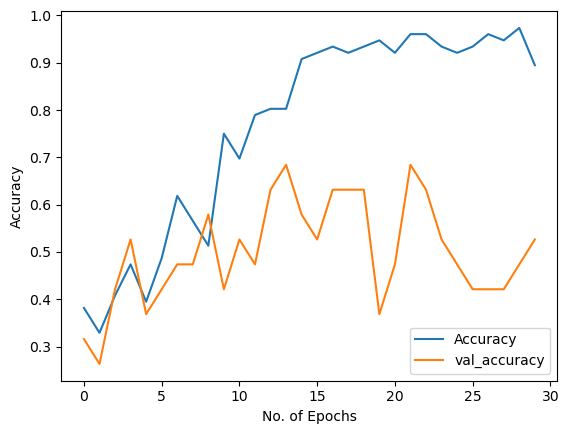

In [23]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

In [24]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
input_shape = (224, 224, 3)
num_classes = 3
model_da = create_model(input_shape, num_classes)

In [27]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [28]:
history = model_da.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3087 - loss: 2.3107 - val_accuracy: 0.3333 - val_loss: 1.2398
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.2398
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3181 - loss: 1.1121 - val_accuracy: 0.4167 - val_loss: 1.0871
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.0871
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2710 - loss: 1.1166 - val_accuracy: 0.2500 - val_loss: 1.1312
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.1312
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3587 - loss: 1.1087 - val_accuracy: 0.3750 - val_loss: 1.0985
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accurac

In [29]:
test_loss, test_accuracy = model_da.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.7500 - loss: 0.7901
Test accuracy: 0.7500


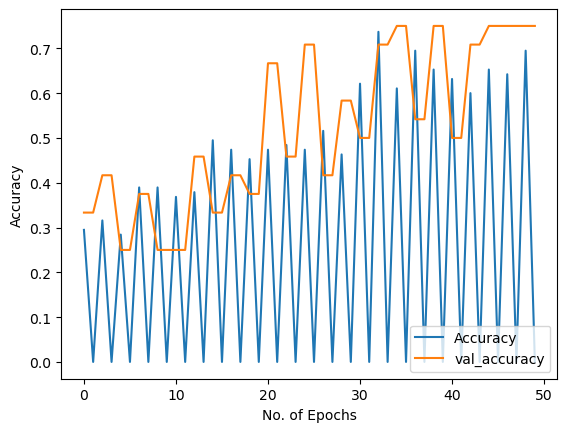

In [30]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

In [31]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
input_shape = (224, 224, 3)
num_classes = 3
model_rms = create_model(input_shape, num_classes)

In [33]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [34]:
history = model_rms.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3352 - loss: 2.9701 - val_accuracy: 0.2500 - val_loss: 1.1126
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.1126
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2849 - loss: 1.2553 - val_accuracy: 0.2500 - val_loss: 1.1016
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.1016
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3230 - loss: 1.0968 - val_accuracy: 0.2500 - val_loss: 1.1045
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.1045
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2899 - loss: 1.0952 - val_accuracy: 0.2500 - val_loss: 1.1161
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accu

In [35]:
test_loss, test_accuracy = model_rms.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.4583 - loss: 1.0157
Test accuracy: 0.4583
